# **Populations of U.S. States**

### **ETL BELOW (Extract, Transform, Load)**
### MacKenna Landry, i310D
Used Beautiful Soup API
---



Check if beautifulsoup and pandas are already installed
If not, install it and then import


In [ ]:

try:
    from bs4 import BeautifulSoup
    import pandas
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
import requests



Next, define URL, request URL, and parse the content with Beautiful soup

In [ ]:
#Define URL
url = "https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population"

#request url
r = requests.get(url)

#Parse HTML content with beautiful soup
bs = BeautifulSoup(r.content, "html.parser")


Find the table in the html file. Then create empty lists to store the data. Then loop through the table and add the specific data to their specific lists. Then create a dictionary with the final data and add the key, value paired data.


Then convert the data into a data frame and start transforming the data. We need to get rid of the left column and rename the index. Drop the last four rows because we don't need to analyze those. Then clean the data of percent signs, commas, plus signs, and other messy data.

In [ ]:
#find the table in the html file
table = bs.find("table", {"class":"wikitable sortable"})

#create lists for storing the data
ranks = []
states = []
populations_2020 = []
populations_2010 = []
absolute_changes = []
growth = []
seats = []

#loop through the rows in the table
for row in table.find_all("tr"):
    #create list to temporarily store data extracted from each row in the table
    row_data = []

    #loop throught the cells in the rows
    for cell in row.find_all("td"):
      cell_text = cell.get_text(strip=True)
      row_data.append(cell_text)

    #this excludes the header row
    if row_data:
      # Extract and append specific data elements from the row_data list to their specific lists
      ranks.append(row_data[0])
      states.append(row_data[2])
      populations_2020.append(row_data[3])
      populations_2010.append(row_data[4])
      absolute_changes.append(row_data[6])
      growth.append(row_data[5])
      seats.append(row_data[7])

#create dictionary of final data
final_data = {
    "Rank": ranks,
    "State": states,
    "Pop in 2020": populations_2020,
    "Pop in 2010": populations_2010,
    "Growth": growth,
    "Absolute change": absolute_changes,
    "Seats in HOR": seats,
}
final_data = pandas.DataFrame(final_data)
#get rid of leftmost column
final_data.set_index("State", inplace=True)

#drop last four rows of totals because we don't need them for analysis
n = 4
final_data = final_data.head(-n)


#Define a function for cleaning
def clean_string_and_convert(s):
  s = s.replace("%", "")
  s = s.replace("1 (non-voting)", "0")
  s = s.replace("+", "")
  s = s.replace(",","")
  s = s.replace("−", "-")

  #need to keep the negative sign
  if s.startswith("-"):
        s = "-" + s[1:]
  s = float(s)
  return s


final_data["Growth"] = final_data["Growth"].apply(clean_string_and_convert)
final_data["Seats in HOR"] = final_data["Seats in HOR"].apply(clean_string_and_convert)
final_data["Absolute change"] = final_data["Absolute change"].apply(clean_string_and_convert)
final_data["Pop in 2020"] = final_data["Pop in 2020"].apply(clean_string_and_convert)
final_data["Pop in 2010"] = final_data["Pop in 2010"].apply(clean_string_and_convert)

final_data



,Rank,Pop in 2020,Pop in 2010,Growth,Absolute change,Seats in HOR
State,,,,,,
California,1,39538223.0,37253956.0,6.1,2284267.0,52.0
Texas,2,29145505.0,25145561.0,15.9,3999944.0,38.0
Florida,3,21538187.0,18801310.0,14.6,2736877.0,28.0
New York,4,20201249.0,19378102.0,4.2,823147.0,26.0
Pennsylvania,5,13002700.0,12702379.0,2.4,300321.0,17.0
Illinois,6,12812508.0,12830632.0,-0.1,-18124.0,17.0
Ohio,7,11799448.0,11536504.0,2.3,262944.0,15.0
Georgia,8,10711908.0,9687653.0,10.6,1024255.0,14.0
North Carolina,9,10439388.0,9535483.0,9.5,903905.0,14.0


Finally, convert the data into a csv to save.

In [ ]:
final_data.to_csv("US_States_Populations.csv")


# **Descriptive Statistics**

Add more descriptive statistics here

In [ ]:
population_2020 = final_data["Pop in 2020"]
population_2020.describe()


count    5.600000e+01
mean     5.983450e+06
std      7.266323e+06
min      4.732900e+04
25%      1.373736e+06
50%      3.782648e+06
75%      7.060313e+06
max      3.953822e+07
Name: Pop in 2020, dtype: float64

Here is some basic statistics about the distribution of the population in the year 2020. the mean population is around 5,983,450, and the standard deviaiton is 7,266,323 which indicated a notable degree of variability. The minimum population is 47,329, with the maximum being 39,538,220. This distribution provides insights that most states have populations below the mean, with some severe outliers above the mean. Overall, we can determine that most of the states have populations below the mean and there are only a few highly populated states contributing to the higher average. This makes sense when you think about states like Texas and California. The standard deviation suggests that there is a notable degree of variability in population sizes among U.S. states.

# **Visualizations**

# Histogram

Text(0.5, 1.0, 'Population Distribution in US States (2020 Census)')

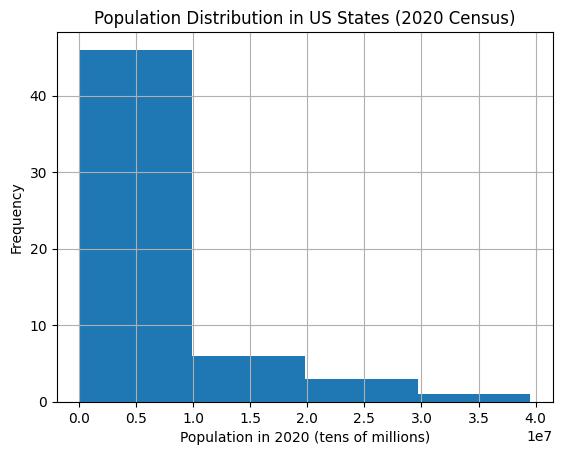

In [ ]:
population_2020.hist(bins=4)
plt.xlabel("Population in 2020 (tens of millions)")
plt.ylabel("Frequency")
plt.title("Population Distribution in US States (2020 Census)")


This histogram represents the population distribution across the United States. The distribution is positively skeed, indicating the majority of states have populations below the mean. However, because of the presence of outliers, such as Texas and California with significantly larger populations, causes the mean to be pulled to a higher number. When we think about the populations of states in the United States, this makes sense as many states have similar populations until you think about the much larger states!

# Bivariate Analysis

In [ ]:
from scipy.stats import pearsonr

p = pearsonr(final_data["Pop in 2020"], final_data["Seats in HOR"])
print (p[0])

0.9977025185792208


For this correlation coefficient I compared the population versus the seats in the House of Representatives. The answer I got was 0.998 which is extremely close to one. This means that the two variables have an extremely close relation. This makes sense because the higher the population, the more seats in the house you have. When we plot the two datasets on a graph we should expect a positive line.

# Scatter Plot

Text(0.5, 1.0, 'Relationship between Population and Seats in the House')

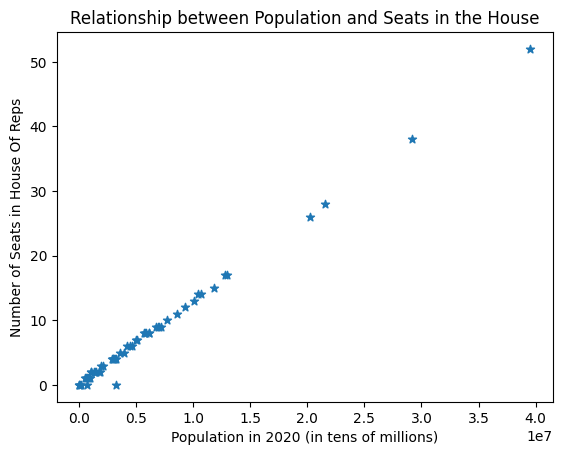

In [ ]:
import matplotlib.pyplot as plt
population = final_data["Pop in 2020"]
seats = final_data["Seats in HOR"]

plt.scatter(population, seats, marker = '*')

plt.xlabel("Population in 2020 (in tens of millions)")
plt.ylabel("Number of Seats in House Of Reps")

# We can add a title too
plt.title("Relationship between Population and Seats in the House")

Here is a graph showing the relationship between the house of representative seats and the population of states. The graph shows a positive correlation between the two and makes sense because of the calculation of the correlation coefficient being extremely close to one. Also, if you take a close look at the graph and see that many of the data points are scattered together with lower numbers of seats and only a few states with very high number of seats. This shows that there is variability in the dataset, but also that there are some very extreme outliers with higher numbers of seats. This makes sense as it is California and Texas that have the most seats because of their higher populations which you can clearly see their points in the graph above. It is also important to notice that some of the "states" have zero seats. These are the places like "district of columbia" and Puerto Rico who are a part of the U.S. but aren't counted as actual states.

# Bar Graph

Text(0.5, 1.0, 'Absolute change in population from 2010 to 2020 for U.S. States')

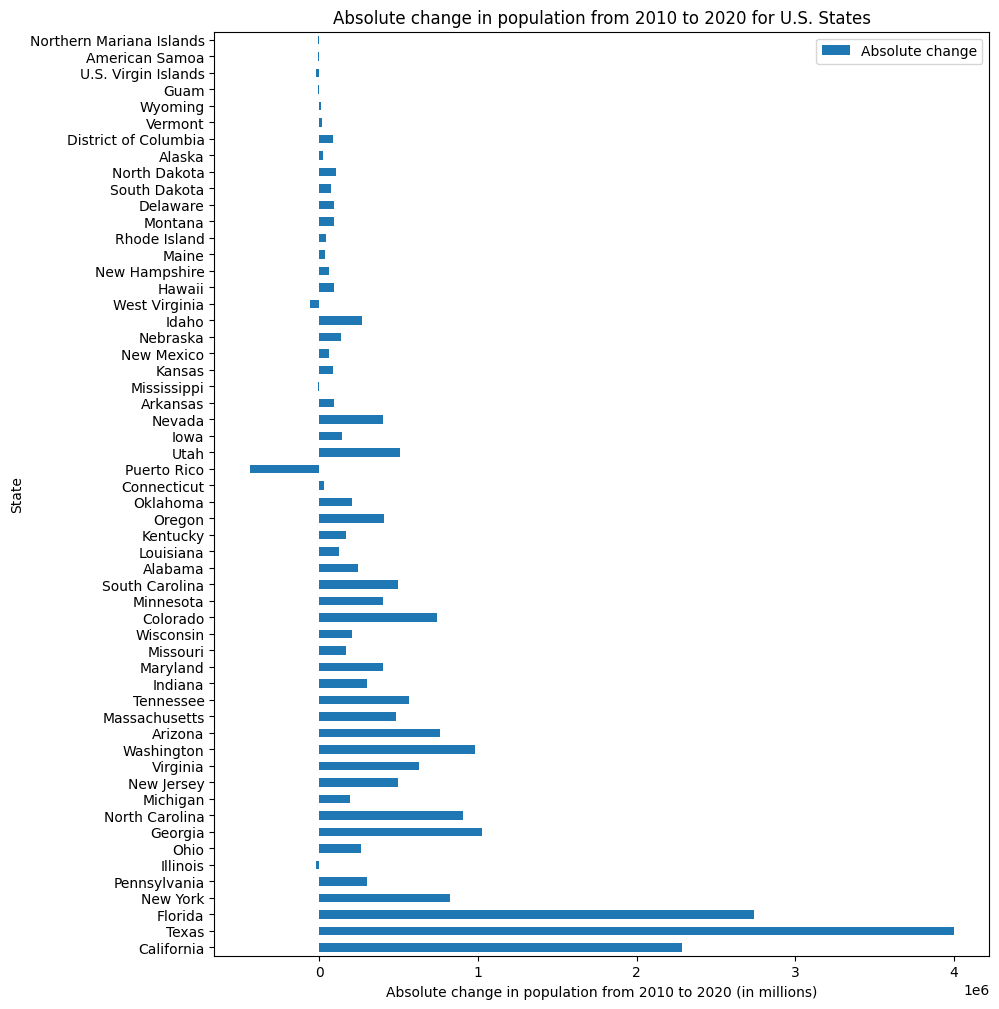

In [ ]:
absolute_change = final_data["Absolute change"]

#plot a horizontal bar graph
final_data.plot(kind='barh', y='Absolute change', figsize=(10, 12))
plt.xlabel("Absolute change in population from 2010 to 2020 (in millions)")
plt.title("Absolute change in population from 2010 to 2020 for U.S. States")

This is a horizontal bar graph that depicts the growth or contraction of populations in the states. It shows the absolute change from the 2010 census to the 2020 census. When looking at this graph you can see that most states increased in population and only a few decreased. Puerto Rico decreased quite a bit. You can also notice that Texas is the state with the highest increase in population. Us texans have been complaining about this, especially Austin. This graph is useful to know which states are growing and which states people are not interested in moving to.